### Classification project for logistic regression:

Classifying with supervised learning whether diabetic patients are readmitted, and if they are, if it's before or after 30 days.

Using the dataset from here: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

In [29]:
import pandas as pd
import patsy as patsy
import seaborn as sns
import pickle

import numpy as np

from sklearn import preprocessing

In [2]:
patientdata = pd.read_csv('diabetic_data.csv')

In [3]:
patientdata.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
patientdata.shape

(101766, 50)

In [5]:
patientdata.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
patientdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

#### Age and weight should be numeric, not object - weight and age are both given as ranges rather than a discrete value
#### Also No and Yes should be changed to 0 and 1

In [7]:
patientdata.weight.unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [8]:
patientdata.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### Replacing the codes with their actual meanings:

In [9]:
patientdata.admission_type_id.replace(
list(range(1,9)),['Emergency',
'Urgent',
'Elective',
'Newborn',
'Not Available',
'NULL',
'Trauma Center',
'Not Mapped'], inplace=True)
#patientdata.admission_type_id.head()

In [10]:
id_list = ['Discharged to home',
'Discharged/transferred to another short term hospital',
'Discharged/transferred to SNF',
'Discharged/transferred to ICF',
'Discharged/transferred to another type of inpatient care institution',
'Discharged/transferred to home with home health service',
'Left AMA',
'Discharged/transferred to home under care of Home IV provider',
'Admitted as an inpatient to this hospital',
'Neonate discharged to another hospital for neonatal aftercare',
'Expired',
'Still patient or expected to return for outpatient services',
'Hospice / home',
'Hospice / medical facility',
'Discharged/transferred within this institution to Medicare approved swing bed',
'Discharged/transferred/referred another institution for outpatient services',
'Discharged/transferred/referred to this institution for outpatient services',
'NULL',
'Expired at home. Medicaid only, hospice.',
'Expired in a medical facility. Medicaid only, hospice.',
'Expired, place unknown. Medicaid only, hospice.',
'Discharged/transferred to another rehab fac including rehab units of a hospital .',
'Discharged/transferred to a long term care hospital.',
'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
'Not Mapped',
'Unknown/Invalid',
'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',
'Discharged/transferred to a federal health care facility.',
'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
'Discharged/transferred to a Critical Access Hospital (CAH).']

patientdata.discharge_disposition_id.replace(list(range(1,len(id_list)+1)),id_list, inplace=True)
patientdata.discharge_disposition_id.head()

0            Not Mapped
1    Discharged to home
2    Discharged to home
3    Discharged to home
4    Discharged to home
Name: discharge_disposition_id, dtype: object

In [11]:
id_list = ['Physician Referral',
'Clinic Referral',
'HMO Referral',
'Transfer from a hospital',
'Transfer from a Skilled Nursing Facility (SNF)',
'Transfer from another health care facility',
'Emergency Room',
'Court/Law Enforcement',
'Not Available',
'Transfer from critial access hospital',
'Normal Delivery',
'Premature Delivery',
'Sick Baby',
'Extramural Birth',
'Not Available',
'NULL',
'Transfer From Another Home Health Agency',
'Readmission to Same Home Health Agency',
'Not Mapped',
'Unknown/Invalid',
'Transfer from hospital inpt/same fac reslt in a sep claim',
'Born inside this hospital',
'Born outside this hospital',
'Transfer from Ambulatory Surgery Center',
'Transfer from Hospice']

patientdata.admission_source_id.replace(list(range(1,len(id_list)+1)),id_list, inplace=True)
patientdata.admission_source_id.head()

0    Physician Referral
1        Emergency Room
2        Emergency Room
3        Emergency Room
4        Emergency Room
Name: admission_source_id, dtype: object

#### Logistic regression, KNN, and SVM all need to be scaled. 

#### I'll use standard scaler (transform to have mean of 0, std of 1).

In [12]:
numeric_columns = list(patientdata.select_dtypes("int64").columns)
numeric_columns.remove('encounter_id')
numeric_columns.remove('patient_nbr')
numeric_columns

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [13]:
scaler = preprocessing.StandardScaler()
patientdata[numeric_columns] = scaler.fit_transform(patientdata[numeric_columns])

In [14]:
# Alternative way to achieve the same thing, but would require merging the non-numeric columns back in afterward:

#scaled_x=preprocessing.StandardScaler().fit_transform(x)
#numeric_patientdata = patientdata.select_dtypes("int64")
#numeric_patientdata = numeric_patientdata.drop(['encounter_id','patient_nbr'],axis=1)
#numeric_patientdata = preprocessing.scale(numeric_patientdata)
#numeric_patientdata.head()

In [15]:
patientdata.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,NULL,Not Mapped,Physician Referral,-1.137649,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,Emergency,Discharged to home,Emergency Room,-0.467653,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,Emergency,Discharged to home,Emergency Room,-0.802651,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,Emergency,Discharged to home,Emergency Room,-0.802651,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,Emergency,Discharged to home,Emergency Room,-1.137649,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [16]:
collist = list(patientdata.columns)
collist.remove('readmitted')
collist.remove('encounter_id')
collist.remove('patient_nbr')
patsy_x_string = (' + ').join(collist)
patsy_x_string

'race + gender + age + weight + admission_type_id + discharge_disposition_id + admission_source_id + time_in_hospital + payer_code + medical_specialty + num_lab_procedures + num_procedures + num_medications + number_outpatient + number_emergency + number_inpatient + diag_1 + diag_2 + diag_3 + number_diagnoses + max_glu_serum + A1Cresult + metformin + repaglinide + nateglinide + chlorpropamide + glimepiride + acetohexamide + glipizide + glyburide + tolbutamide + pioglitazone + rosiglitazone + acarbose + miglitol + troglitazone + tolazamide + examide + citoglipton + insulin + glyburide-metformin + glipizide-metformin + glimepiride-pioglitazone + metformin-rosiglitazone + metformin-pioglitazone + change + diabetesMed'

In [17]:
y, x = patsy.dmatrices(f'readmitted ~ {patsy_x_string}', data=patientdata, return_type="dataframe")
#model = sm.OLS(y, x)
#fit = model.fit()
#fit.summary()

In [18]:
y = patientdata.readmitted

In [19]:
y.head()

0     NO
1    >30
2     NO
3     NO
4     NO
Name: readmitted, dtype: object

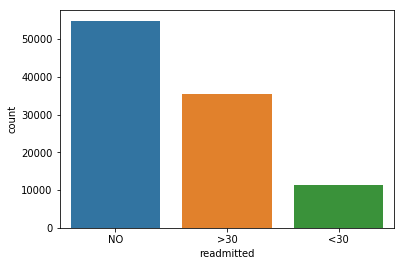

In [20]:
sns.countplot(y);

#### The classes are biased, so I'll need to keep that in mind going forward. I'll need to stratify and/or use SMOTE, etc.

In [21]:
x.head()

,Intercept,race[T.AfricanAmerican],race[T.Asian],race[T.Caucasian],race[T.Hispanic],race[T.Other],gender[T.Male],gender[T.Unknown/Invalid],age[T.[10-20)],age[T.[20-30)],...,change[T.No],diabetesMed[T.Yes],time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-1.137649,-0.106517,-0.785398,-1.848268,-0.291461,-0.21262,-0.503276,-3.321596
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,-0.467653,0.808384,-0.785398,0.243390,-0.291461,-0.21262,-0.503276,0.815784
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,-0.802651,-1.631351,2.145781,-0.371804,1.286748,-0.21262,0.288579,-0.735733
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,-0.802651,0.045967,-0.199162,-0.002688,-0.291461,-0.21262,-0.503276,-0.218561
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,-1.137649,0.401761,-0.785398,-0.986997,-0.291461,-0.21262,-0.503276,-1.252906


In [24]:
x.shape

(101766, 2467)

#### Now that these look nice, time to pickle my stuff to use in different models:

In [26]:
with open('x.pkl', 'wb') as picklefile:
    pickle.dump(x, picklefile)
    
with open('y.pkl', 'wb') as picklefile:
    pickle.dump(y, picklefile)
    
with open('patientdata.pkl', 'wb') as picklefile:
    pickle.dump(patientdata, picklefile)